In [1]:
#Import library and packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# read dataset and put it in dfs dataframe
dfs = [pd.read_csv('./CSV_FIles/user_' + user + '.csv') for user in ['a','b']]
data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)
data.shape

(5760, 113)

In [3]:
#I want to work some sample of that dataset
data_sample = data.sample(frac=1)# In this case it is 100% data randomly
#fraction
data_sample

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
634,1.0,3570.358043,2063.710533,0.456885,3.249995,0.904365,2.133026,2.139093,3.209357,3568.120212,...,28.690691,40.909131,3649.644216,2123.882552,6.433752,16.377331,12.937765,18.813944,33.382509,48.405477
519,2.0,3572.012160,2064.363908,1.276283,2.241194,0.817629,2.037404,3.483975,2.982528,3567.117078,...,68.654852,37.173007,3607.344422,2112.397644,10.002576,20.026195,4.766066,12.693254,80.381629,42.664033
2660,1.0,3577.105212,2066.827754,0.934807,2.149105,0.307708,1.416313,1.622345,3.011557,3566.396533,...,19.997132,26.721568,3643.312676,2116.121387,3.414466,9.414864,6.781557,13.850787,25.237995,31.099147
2831,0.0,3570.545677,2063.521648,1.498312,2.469780,0.672349,1.436351,1.690035,2.344049,3566.263726,...,1.933751,1.780409,3569.917242,2062.488143,1.718757,2.002083,0.722192,1.146630,1.221092,1.732873
917,2.0,3570.268998,2062.539180,1.192891,2.941243,0.585210,1.807655,1.773141,2.250589,3570.684256,...,1.990175,1.542020,3569.966082,2062.837023,0.546132,1.499412,0.965567,1.577828,1.143104,1.852612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,1.0,3568.423670,2063.099248,1.897790,3.728823,1.304186,1.854353,1.366575,2.546458,3563.560922,...,36.551948,66.931186,3725.210509,2180.197439,8.820788,38.012788,19.601233,29.431054,38.559351,67.470041
4834,0.0,3576.455470,2067.504612,0.819413,2.076764,0.262696,1.020132,2.796766,2.571867,3569.442445,...,1.147571,1.612922,3573.836239,2065.730532,0.662093,1.449532,0.325079,0.907729,1.947072,2.149902
1348,0.0,3576.454303,2067.954953,0.882673,2.871386,0.642941,2.006386,1.854039,3.081949,3569.404934,...,1.127120,2.103345,3572.996892,2064.845622,0.865644,2.348680,1.194248,2.655033,1.460307,2.566234
5021,0.0,3576.554741,2067.650210,0.924510,1.911533,0.685454,2.356668,2.370724,2.985399,3566.896197,...,32.993621,18.821511,3601.147756,2086.525780,2.441740,10.196956,3.024007,9.499536,39.849476,23.402449


In [4]:
# Feature importance in random forest
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=3)
selector

VarianceThreshold(threshold=3)

In [5]:
selector.fit(data_sample)

getSupport = selector.get_support()
print(getSupport.shape)
getSupport

(113,)


array([False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [6]:
data_sample_col = data_sample.columns[getSupport]
print("The shape of Trim_data_sample->",data_sample_col.shape)
data_sample_col

The shape of Trim_data_sample-> (78,)


Index(['AF3 delta std', 'AF3 delta m', 'F7 delta std', 'F3 delta std',
       'F3 delta m', 'F3 theta std', 'F3 theta m', 'F3 alpha std',
       'F3 alpha m', 'F3 beta std', 'F3 beta m', 'FC5 delta std',
       'FC5 delta m', 'T7 delta std', 'T7 delta m', 'P7 delta std',
       'P7 delta m', 'P7 theta std', 'P7 theta m', 'P7 alpha std',
       'P7 alpha m', 'P7 beta std', 'P7 beta m', 'O1 delta std', 'O1 delta m',
       'O1 beta std', 'O1 beta m', 'O2 delta std', 'O2 delta m',
       'O2 theta std', 'O2 theta m', 'O2 alpha std', 'O2 alpha m',
       'O2 beta std', 'O2 beta m', 'P8 delta std', 'P8 delta m', 'P8 theta m',
       'P8 alpha m', 'P8 beta std', 'P8 beta m', 'T8 delta std', 'T8 delta m',
       'T8 theta std', 'T8 theta m', 'T8 alpha std', 'T8 alpha m',
       'T8 beta std', 'T8 beta m', 'FC6 delta std', 'FC6 delta m',
       'FC6 theta std', 'FC6 theta m', 'FC6 alpha std', 'FC6 alpha m',
       'FC6 beta std', 'FC6 beta m', 'F4 delta std', 'F4 delta m',
       'F4 theta m',

In [7]:
#get features which have the variance less than the set threshold value using list comprehension
selected_cols = [column for column in data_sample.columns if column not in data_sample_col ]
len(selected_cols)# the length of the list is 35 (the false cols)


35

In [8]:
Final_DataSet = data_sample.drop(labels=selected_cols, axis=1)
Final_DataSet.head  # The data set is now ready to use in model

<bound method NDFrame.head of       AF3 delta std  AF3 delta m  F7 delta std  F3 delta std   F3 delta m  \
634     3570.358043  2063.710533   3568.120212   3661.870396  2134.110986   
519     3572.012160  2064.363908   3567.117078   3588.063911  2076.057184   
2660    3577.105212  2066.827754   3566.396533   3590.737435  2097.404621   
2831    3570.545677  2063.521648   3566.263726   3570.871615  2066.042491   
917     3570.268998  2062.539180   3570.684256   3565.142304  2073.996762   
...             ...          ...           ...           ...          ...   
3290    3568.423670  2063.099248   3563.560922   3721.781859  2177.507069   
4834    3576.455470  2067.504612   3569.442445   3572.345754  2073.846582   
1348    3576.454303  2067.954953   3569.404934   3574.974605  2069.329257   
5021    3576.554741  2067.650210   3566.896197   3636.309502  2120.004145   
1852    3572.824268  2065.900620   3565.456852   3645.112257  2142.549705   

      F3 theta std  F3 theta m  F3 alpha std 

In [10]:
# copy the datasample to df dataframe
df = Final_DataSet.copy()

y = df['Class'].copy()
X = data_sample.drop('Class', axis=1)
# Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)


KeyError: 'Class'

In [ ]:
#RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier(n_estimators=120,class_weight='balanced', criterion='entropy',)#class_weight='balanced', criterion='entropy',
mdl.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=120)

In [ ]:
mdl.score(X_test,y_test)*100

88.28125

In [ ]:
# # Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV
# param_dict = {
#     "criterion":["gini","entropy"],
#     "max_depth":[1,2,3,4,5,6,7,8,None],
#     "class_weight": ['balanced', 'balanced_subsample',None],
#     "max_features":['sqrt', 'log2']

# }

# # K fold corss validation
# grid = GridSearchCV(mdl,param_grid=param_dict, cv=5, n_jobs=-1)# CV = cross validation
# '''n_jobs = -1 means the n_jobs parameter can be used to distribute and exploit all the CPUs available in the local computer'''


In [ ]:
# Feature importance in random forest
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=3)
# selector

VarianceThreshold(threshold=3)

In [ ]:
selector.fit(X_train)
selector.get_support()


array([ True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
print(X_train.columns[selector.get_support()].shape)
abc = X_train.drop(X_train.columns[selector.get_support()], axis=1)
abc.columns
X_train_trim = X_train.drop(abc.columns, axis=1)
X_train_trim



(78,)


,AF3 delta std,AF3 delta m,F7 delta std,F3 delta std,F3 delta m,F3 theta std,F3 theta m,F3 alpha std,F3 alpha m,F3 beta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
3076,3572.027136,2064.146180,3563.995445,3621.243626,2120.715055,15.859108,42.858308,10.578798,52.130701,50.646608,...,50.584956,71.693362,3619.760598,2123.911556,17.870220,40.598388,10.009160,55.196876,50.735310,70.211586
2724,3569.682868,2064.401543,3565.860702,3659.928334,2170.027874,7.891360,17.678841,9.557791,17.191556,30.366976,...,21.791447,33.420930,3646.675636,2142.483930,6.693199,21.274994,7.185486,13.158422,26.523305,40.190928
2366,3572.961498,2065.053021,3564.634710,3561.306244,2085.199516,15.403869,21.401615,7.074566,32.828161,57.511603,...,51.828988,50.625223,3547.851566,2101.148405,13.191891,23.220265,8.508776,35.569543,56.558038,55.376266
308,3575.384840,2065.941357,3572.243896,3597.151941,2098.945768,8.400345,15.755961,4.379878,11.169033,29.876394,...,22.051974,25.120462,3613.682407,2104.785778,5.299796,13.524333,6.242915,9.177542,27.259060,30.242592
3622,3574.205508,2065.277392,3570.944583,3601.618186,2090.047227,6.401163,16.668838,11.274900,22.755214,23.351923,...,18.290433,30.323079,3615.558427,2113.553614,3.678107,12.498010,7.530224,19.905400,21.797580,36.113382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,3570.167319,2064.918633,3569.959183,3590.102293,2078.167598,1.597232,3.131035,0.504126,2.334475,1.592381,...,1.330798,1.862323,3572.337915,2064.853002,0.346046,1.985277,0.704804,1.624659,1.280812,2.110191
859,3576.981004,2067.108280,3570.553459,3571.111629,2065.394705,1.818140,2.745309,1.370857,4.688130,1.163745,...,1.407487,2.108329,3573.382650,2064.580759,0.234698,0.828384,0.603232,1.723646,1.991662,2.290068
2297,3572.407635,2064.379259,3570.251588,3577.397058,2077.453547,3.190318,9.283449,7.003852,17.172073,31.246098,...,24.865313,33.106138,3583.494168,2079.471706,5.053676,14.337757,7.653187,13.584068,28.868215,40.853282
2136,3574.961766,2065.691398,3563.803154,3621.043623,2115.600783,7.721305,20.710122,13.859956,31.147344,39.934168,...,29.720565,39.011129,3620.236549,2114.034665,7.279527,17.518312,11.505987,28.667273,36.891866,48.954545


In [ ]:
mdl = RandomForestClassifier(n_estimators=120,class_weight='balanced', criterion='entropy',)#class_weight='balanced', criterion='entropy',
mdl.fit(X_train_trim,y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=120)

In [ ]:
mdl.score(X_test,y_test)*100

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AF3 alpha m
- AF3 alpha std
- AF3 beta m
- AF3 beta std
- AF3 theta m
- ...


In [ ]:
# grid.best_score_

In [ ]:
y_predicted = mdl.predict(X_test)

In [ ]:
# I use confusion matrix to measure the performance of classification models,
#which aim to predict a categorical label for each input instance.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[339,  19,  19],
       [ 18, 342,  24],
       [ 16,  20, 355]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

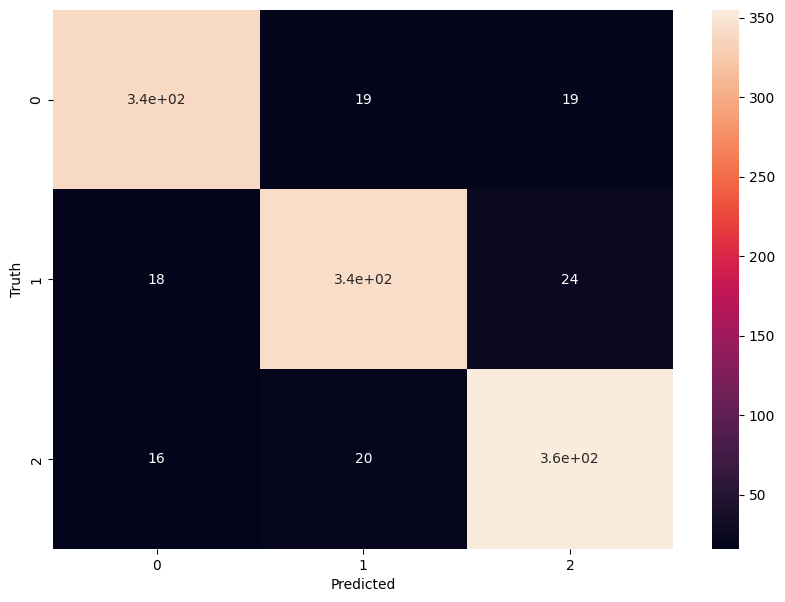

In [ ]:
#ploting in graph..
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
plt.figure(figsize=(10,7))
sbn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')